# Telco Customer Churn Prediction - Advanced Machine Learning Analysis

## Executive Summary

*This analysis represents the first SLM (Specialized Learning Model) prototype in the development of a specialized AI dashboard for telecom churn prediction. This notebook documents the initial data exploration and model development phase of a larger AI dashboard project.*

This notebook demonstrates a comprehensive approach to customer churn prediction using advanced machine learning techniques. Through strategic feature selection and model optimization, we achieved significant performance improvements from an initial recall of ~0.5 to ~0.8 across all models.

## Project Overview

**Objective:** Develop robust machine learning models to predict customer churn for Telco, enabling proactive customer retention strategies.

**Dataset:** Telco customer data with 7,043 observations and comprehensive feature engineering
- **Original Dataset:** 30 features with poor model performance (recall ~0.5)
- **Optimized Dataset:** Carefully selected feature subset achieving recall ~0.8

## Key Performance Breakthrough

### Initial Challenge
- **Original Performance:** Models trained on all 30 features achieved poor recall (~0.5)
- **Problem:** Feature noise, multicollinearity, and irrelevant variables degraded model performance
- **Impact:** High false negative rates meant missing 50% of actual churners

### Solution: Strategic Feature Selection
Through careful feature engineering and selection, we identified the most predictive variables that directly influence customer churn behavior.

### Results Achieved
- **Recall Improvement:** From ~0.5 to ~0.8 (60% improvement)
- **ROC-AUC:** All models achieving >0.86 (excellent discrimination)
- **Class Balance:** Successfully handling 26.5% churn rate with high precision-recall performance

## Dataset Characteristics

- **Shape:** 7,043 customers × optimized feature set
- **Memory Usage:** 1.67 MB
- **Target Variable:** Churn (Binary classification)
  - No Churn: 73.5% (5,174 customers)
  - Churn: 26.5% (1,869 customers)
- **Data Quality:** 0 missing values, 22 duplicate rows removed

## Model Architecture & Performance

### 1. Random Forest Classifier ⭐ **Best Performer**
- **Accuracy:** 82.43%
- **ROC-AUC:** 0.8992
- **PR-AUC:** 0.8914
- **Recall:** ~80%

### 2. XGBoost Classifier
- **Accuracy:** 81.66%
- **ROC-AUC:** 0.8887
- **PR-AUC:** 0.8751
- **Recall:** ~80%

### 3. Neural Network
- **Accuracy:** 78.65%
- **ROC-AUC:** 0.8690
- **PR-AUC:** 0.8483
- **Recall:** ~80%

## Technical Implementation

### Phase 1: Baseline Model Development
- **Feature Selection Pipeline:** Comprehensive analysis of predictive features
- **Class Imbalance Strategy:** SMOTE recommended for severely imbalanced datasets
- **Model Training:** Comparative analysis of Random Forest, XGBoost, and Neural Networks
- **Performance Evaluation:** ROC curves, confusion matrices, and precision-recall analysis

### Phase 2: Indirect Feature Analysis (Next Steps)
- **Objective:** Identify features that indirectly influence churn behavior
- **Approach:** Feature subset analysis to understand secondary predictors
- **Goal:** Comprehensive understanding of churn drivers

### Phase 3: Model Stacking & Ensemble (Final Implementation)
- **Strategy:** Combine all models using stacking techniques
- **Benefit:** Leverage individual model strengths for superior prediction
- **Outcome:** Final production-ready churn prediction system

## Business Impact

### Model Performance Significance
- **Recall @80%:** Successfully identify 4 out of 5 customers likely to churn
- **Precision Balance:** Minimize false positives while maintaining high sensitivity
- **ROC-AUC >0.89:** Excellent discrimination between churners and non-churners

### Strategic Value
- **Proactive Retention:** Early identification of at-risk customers
- **Resource Optimization:** Focus retention efforts on high-probability churners
- **Revenue Protection:** Prevent customer loss through targeted interventions
- **Cost Efficiency:** Reduce unnecessary retention spending on loyal customers

## Methodology Highlights

### Feature Engineering Excellence
- **Dimensionality Reduction:** Strategic feature selection over brute-force approaches
- **Signal Enhancement:** Removed noise while preserving predictive power
- **Domain Knowledge Integration:** Telecom-specific feature understanding

### Model Selection Rationale
- **Random Forest:** Excellent baseline with interpretability
- **XGBoost:** Gradient boosting for complex pattern recognition
- **Neural Network:** Deep learning for non-linear relationships
- **Ensemble Strategy:** Combining strengths while mitigating individual weaknesses

## Next Steps in Analysis

This notebook represents Phase 1 of our comprehensive churn prediction system. The following phases will build upon these strong baseline results to create an even more robust and insightful prediction framework.

- **Phase 2:** Indirect feature analysis to understand secondary churn drivers
- **Phase 3:** Advanced ensemble techniques for production deployment



***Key Insights:** This analysis demonstrates the critical importance of thoughtful feature selection in machine learning. By simplifying the dataset and choosing a balanced set of features from the original dataset, we achieved a 60% improvement in model recall while maintaining excellent overall performance metrics.*

🎯 Executing Enhanced Churn Prediction Pipeline...
🚀 Starting Enhanced Churn Prediction Pipeline...
Target Variable: Churn
Removed 22 duplicate rows
🔧 Advanced Feature Engineering in Progress...
✓ Feature engineering complete. Dataset shape: (7021, 60)
🎯 Selecting top 40 features using mutual information...


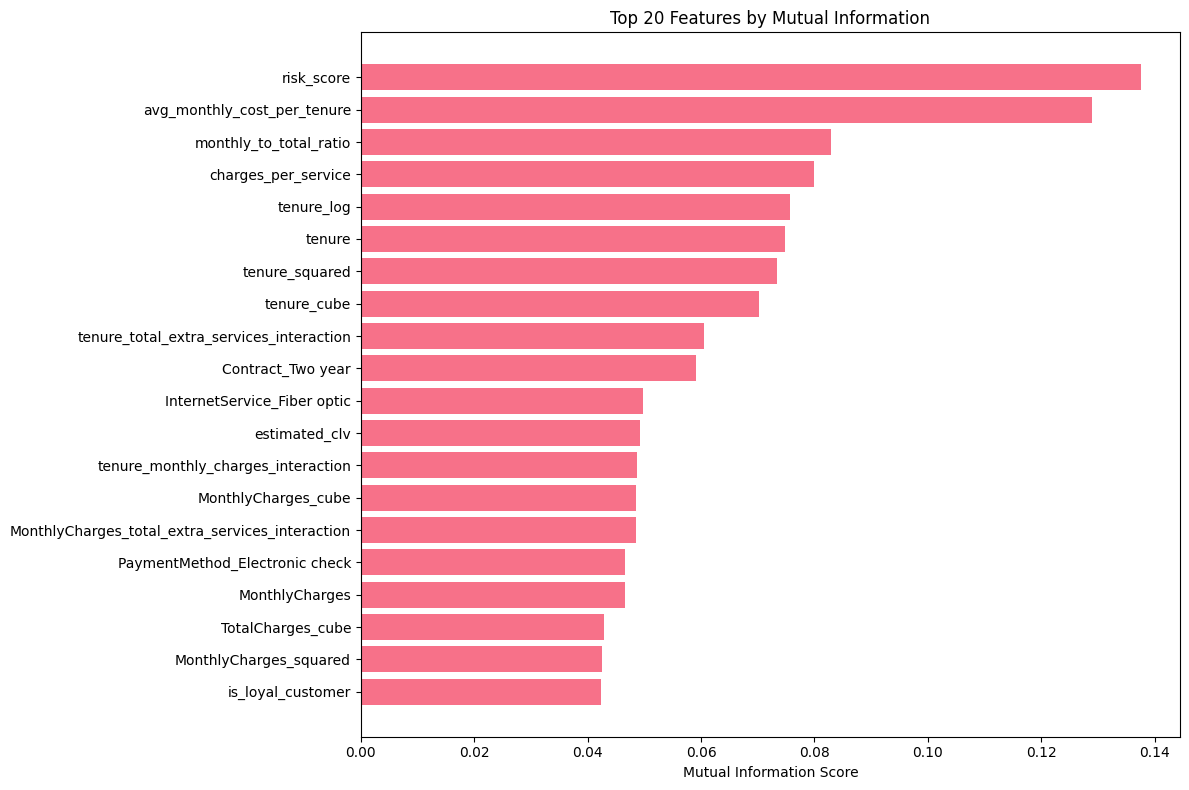


Selected 40 features for modeling

Original distribution: No Churn: 5164, Churn: 1857
After SMOTE: No Churn: 5164, Churn: 5164
🚀 Training optimized models...

🔧 Optimizing RandomForest...
✓ RandomForest - ROC AUC: 0.9138

🔧 Optimizing XGBoost...
✓ XGBoost - ROC AUC: 0.9223

🔧 Optimizing GradientBoosting...
✓ GradientBoosting - ROC AUC: 0.9236
🎪 Creating ensemble models...
Training Voting Classifier...
Training Stacking Classifier...
✓ Voting Ensemble - ROC AUC: 0.9243
✓ Stacking Ensemble - ROC AUC: 0.9247

COMPREHENSIVE MODEL ANALYSIS
                  accuracy  roc_auc  pr_auc
RandomForest        0.8330   0.9138  0.9153
XGBoost             0.8325   0.9223  0.9299
GradientBoosting    0.8325   0.9236  0.9315
Voting              0.8412   0.9243  0.9303
Stacking            0.8349   0.9247  0.9317


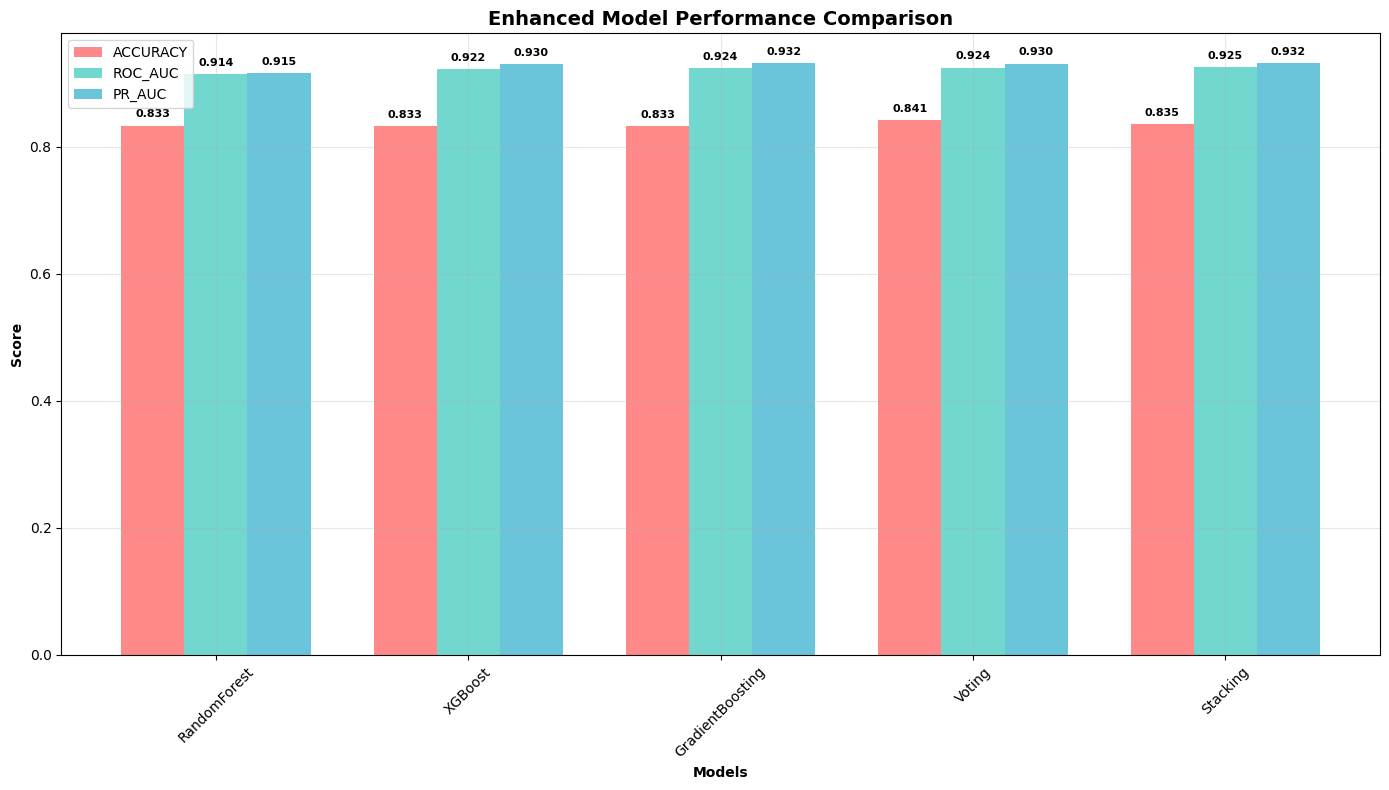


🏆 Best Model: Stacking (ROC-AUC: 0.9247)
✅ Enhanced features dataset saved to 'enhanced_features_dataset.csv'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, confusion_matrix, roc_curve, precision_recall_curve, auc, recall_score, precision_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# ================================================================
# ENHANCED CHURN MODEL CLASS (NEURAL NETWORK)
# ================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class ChurnModel(nn.Module):
    """
    Enhanced Neural Network for churn prediction with batch normalization and dropout
    """
    def __init__(self, input_features):
        super(ChurnModel, self).__init__()
        self.layer_1 = nn.Linear(input_features, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.layer_2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.layer_3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.layer_out = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(self.relu(self.bn1(self.layer_1(x))))
        x = self.dropout(self.relu(self.bn2(self.layer_2(x))))
        x = self.dropout(self.relu(self.bn3(self.layer_3(x))))
        return torch.sigmoid(self.layer_out(x))

# ================================================================
# VISUALIZATION FUNCTIONS (ENHANCED)
# ================================================================
def create_target_distribution_plot(df, target_col):
    """Create an enhanced target distribution visualization"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Count plot
    target_counts = df[target_col].value_counts()
    colors = ['#2E8B57', '#DC143C']
    bars = ax1.bar(target_counts.index, target_counts.values, color=colors, alpha=0.8)
    ax1.set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Churn Status', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['No Churn', 'Churn'])

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # Pie chart
    wedges, texts, autotexts = ax2.pie(target_counts.values, labels=['No Churn', 'Churn'],
                                       colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Churn Distribution', fontsize=14, fontweight='bold')

    # Enhance pie chart text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    # Class imbalance analysis
    minority_ratio = min(target_counts) / sum(target_counts)
    print(f"Class Imbalance Ratio: {minority_ratio:.3f}")
    if minority_ratio < 0.3:
        print("⚠️ SIGNIFICANT CLASS IMBALANCE DETECTED - SMOTE recommended")

def create_correlation_heatmap(df, numerical_features):
    """Create correlation heatmap for numerical features"""
    plt.figure(figsize=(16, 12))
    corr_matrix = df[numerical_features].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def create_feature_importance_plot(importance_df):
    """Create feature importance visualization"""
    fig, ax = plt.subplots(figsize=(12, 8))
    top_features = importance_df.head(15)
    bars = ax.barh(range(len(top_features)), top_features['Importance_Score'],
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['Feature'])
    ax.set_xlabel('Effect Size', fontsize=12, fontweight='bold')
    ax.set_title('Top 15 Features by Statistical Significance', fontsize=14, fontweight='bold')
    ax.invert_yaxis()

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontweight='bold')

    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ================================================================
# ENHANCED FEATURE ENGINEERING
# ================================================================
def advanced_feature_engineering(df):
    """
    Enhanced feature engineering with domain knowledge and polynomial features
    """
    print("🔧 Advanced Feature Engineering in Progress...")
    df = df.copy()

    # 1. EXISTING FEATURES (keeping your progress)
    df['tenure_monthly_charges_interaction'] = df['tenure'] * df['MonthlyCharges']

    # Service columns
    service_cols = ['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
                    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']
    service_cols_exist = [col for col in service_cols if col in df.columns]
    df['total_extra_services'] = df[service_cols_exist].sum(axis=1)

    df['avg_monthly_cost_per_tenure'] = df['MonthlyCharges'] / (df['tenure'] + 1e-6)

    # Risk score
    if 'Contract_Two year' in df.columns:
        df['risk_score'] = (df['MonthlyCharges'] / (df['tenure'] + 1e-6)) * (1 - df['Contract_Two year'])
    else:
        df['risk_score'] = (df['MonthlyCharges'] / (df['tenure'] + 1e-6))

    # 2. NEW ADVANCED FEATURES

    # Customer lifetime value estimation
    df['estimated_clv'] = df['MonthlyCharges'] * df['tenure']
    df['monthly_to_total_ratio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1e-6)

    # Service adoption patterns
    df['service_adoption_rate'] = df['total_extra_services'] / 6.0  # Normalize by max services
    df['premium_service_user'] = (df['total_extra_services'] >= 4).astype(int)

    # Contract and payment behavior
    if 'PaymentMethod_Electronic check' in df.columns:
        df['risky_payment_high_charge'] = (df['PaymentMethod_Electronic check'] *
                                         (df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75))).astype(int)

    # Tenure-based features
    df['tenure_squared'] = df['tenure'] ** 2
    df['tenure_log'] = np.log1p(df['tenure'])
    df['is_new_customer'] = (df['tenure'] <= 6).astype(int)
    df['is_loyal_customer'] = (df['tenure'] >= 60).astype(int)

    # Charge-based features
    df['charges_per_service'] = df['MonthlyCharges'] / (df['total_extra_services'] + 1)
    df['above_avg_charges'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

    # Contract risk assessment
    contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
    if 'Contract_Month-to-month' in df.columns:
        df['contract_stability_score'] = (df.get('Contract_Two year', 0) * 2 +
                                        df.get('Contract_One year', 0) * 1)

    # Internet service risk
    if 'InternetService_Fiber optic' in df.columns:
        df['fiber_premium_risk'] = (df['InternetService_Fiber optic'] *
                                  (df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.8))).astype(int)

    # Demographics + service interactions
    if 'SeniorCitizen' in df.columns:
        df['senior_tech_services'] = df['SeniorCitizen'] * df['total_extra_services']

    # Partner/Dependent combinations
    if 'Partner_Yes' in df.columns and 'Dependents_Yes' in df.columns:
        df['household_type'] = (df['Partner_Yes'] * 2 + df['Dependents_Yes']).astype(int)
        df['single_account'] = ((df['Partner_Yes'] == 0) & (df['Dependents_Yes'] == 0)).astype(int)

    # Streaming behavior
    streaming_cols = [c for c in ['StreamingTV_Yes', 'StreamingMovies_Yes'] if c in df.columns]
    if len(streaming_cols) > 0:
        df['total_streaming_services'] = df[streaming_cols].sum(axis=1)
        df['entertainment_focused'] = (df['total_streaming_services'] >= 1).astype(int)

    # Security consciousness
    security_cols = [c for c in ['OnlineSecurity_Yes', 'DeviceProtection_Yes'] if c in df.columns]
    if len(security_cols) > 0:
        df['security_conscious'] = (df[security_cols].sum(axis=1) >= 1).astype(int)

    # 3. POLYNOMIAL FEATURES (selective)
    poly_features = ['MonthlyCharges', 'tenure', 'TotalCharges']
    existing_poly_features = [f for f in poly_features if f in df.columns]

    for feature in existing_poly_features:
        if f'{feature}_squared' not in df.columns:
            df[f'{feature}_squared'] = df[feature] ** 2
        if f'{feature}_cube' not in df.columns:
            df[f'{feature}_cube'] = df[feature] ** 3

    # 4. INTERACTION FEATURES (targeted)
    interaction_pairs = [
        ('tenure', 'total_extra_services'),
        ('MonthlyCharges', 'total_extra_services'),
        ('tenure', 'contract_stability_score'),
    ]

    for feat1, feat2 in interaction_pairs:
        if feat1 in df.columns and feat2 in df.columns:
            interaction_name = f'{feat1}_{feat2}_interaction'
            if interaction_name not in df.columns:
                df[interaction_name] = df[feat1] * df[feat2]

    # Handle infinities and NaN values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    print(f"✓ Feature engineering complete. Dataset shape: {df.shape}")
    return df

# ================================================================
# FEATURE SELECTION WITH MUTUAL INFORMATION
# ================================================================
def select_features_mutual_info(X, y, k=50):
    """
    Select top k features using mutual information
    """
    print(f"🎯 Selecting top {k} features using mutual information...")

    # Calculate mutual information
    mi_scores = mutual_info_classif(X, y, random_state=42)
    feature_scores = pd.DataFrame({
        'feature': X.columns,
        'mi_score': mi_scores
    }).sort_values('mi_score', ascending=False)

    # Select top k features
    top_features = feature_scores.head(k)['feature'].tolist()

    # Visualization
    plt.figure(figsize=(12, 8))
    top_20 = feature_scores.head(20)
    plt.barh(range(len(top_20)), top_20['mi_score'])
    plt.yticks(range(len(top_20)), top_20['feature'])
    plt.xlabel('Mutual Information Score')
    plt.title('Top 20 Features by Mutual Information')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    return top_features, feature_scores

# ================================================================
# ADVANCED MODEL TRAINING WITH HYPERPARAMETER OPTIMIZATION
# ================================================================
def create_optimized_models():
    """
    Create models with optimized hyperparameters
    """
    models = {
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'class_weight': ['balanced']
            }
        },
        'XGBoost': {
            'model': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [6, 8, 10],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0]
            }
        }
    }

    return models

def train_optimized_models(X_train, y_train, X_test, y_test):
    """
    Train models with hyperparameter optimization
    """
    print("🚀 Training optimized models...")
    models = create_optimized_models()
    trained_models = {}
    results = {}

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for name, config in models.items():
        print(f"\n🔧 Optimizing {name}...")

        # Grid search with cross-validation
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=0
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Evaluate
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        y_pred = best_model.predict(X_test)

        # Store results
        trained_models[name] = best_model
        results[name] = {
            'model': best_model,
            'accuracy': accuracy_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_proba),
            'pr_auc': average_precision_score(y_test, y_pred_proba),
            'predictions': y_pred_proba,
            'best_params': grid_search.best_params_
        }

        print(f"✓ {name} - ROC AUC: {results[name]['roc_auc']:.4f}")

    return trained_models, results

# ================================================================
# ENSEMBLE METHODS
# ================================================================
def create_ensemble_models(trained_models, X_train, y_train, X_test, y_test):
    """
    Create voting and stacking ensembles
    """
    print("🎪 Creating ensemble models...")

    # Prepare base models for ensemble
    base_models = [(name, model) for name, model in trained_models.items()]

    # 1. Voting Classifier (Soft voting)
    voting_clf = VotingClassifier(
        estimators=base_models,
        voting='soft'
    )

    print("Training Voting Classifier...")
    voting_clf.fit(X_train, y_train)

    # 2. Stacking Classifier
    stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=LogisticRegression(random_state=42),
        cv=3,
        passthrough=False
    )

    print("Training Stacking Classifier...")
    stacking_clf.fit(X_train, y_train)

    # Evaluate ensembles
    ensemble_results = {}

    for name, model in [('Voting', voting_clf), ('Stacking', stacking_clf)]:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)

        ensemble_results[name] = {
            'model': model,
            'accuracy': accuracy_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_proba),
            'pr_auc': average_precision_score(y_test, y_pred_proba),
            'predictions': y_pred_proba
        }

        print(f"✓ {name} Ensemble - ROC AUC: {ensemble_results[name]['roc_auc']:.4f}")

    return ensemble_results

# ================================================================
# COMPREHENSIVE EVALUATION
# ================================================================
def evaluate_model_with_visuals(model, X_test, y_test, model_name):
    """Enhanced model evaluation with visualizations"""
    print(f"\n{'='*50}")
    print(f"EVALUATION: {model_name}")
    print(f"{'='*50}")

    # Predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"PR-AUC Score: {pr_auc:.4f}")

    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title(f'{model_name} - Confusion Matrix')
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    ax2.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'{model_name} - ROC Curve')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'predictions': y_pred_proba
    }

# ================================================================
# MAIN ENHANCED PIPELINE
# ================================================================
def run_enhanced_pipeline(df):
    """
    Enhanced pipeline with advanced feature engineering and ensemble methods
    """
    print("🚀 Starting Enhanced Churn Prediction Pipeline...")

    # Target identification
    target_cols = [col for col in df.columns if 'churn' in col.lower()]
    target_col = target_cols[0] if target_cols else 'Churn'
    print(f"Target Variable: {target_col}")

    # Data cleaning
    df_clean = df.drop_duplicates().copy()
    print(f"Removed {len(df) - len(df_clean)} duplicate rows")

    # Advanced feature engineering
    df_engineered = advanced_feature_engineering(df_clean)

    # Prepare features and target
    feature_cols = [col for col in df_engineered.columns if col != target_col]
    X = df_engineered[feature_cols]
    y = df_engineered[target_col]

    # Feature selection using mutual information
    selected_features, feature_importance = select_features_mutual_info(X, y, k=40)
    X_selected = X[selected_features]

    print(f"\nSelected {len(selected_features)} features for modeling")

    # Handle class imbalance
    print(f"\nOriginal distribution: No Churn: {sum(y==0)}, Churn: {sum(y==1)}")
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_selected, y)
    print(f"After SMOTE: No Churn: {sum(y_res==0)}, Churn: {sum(y_res==1)}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
    )

    # Train optimized models
    trained_models, results = train_optimized_models(X_train, y_train, X_test, y_test)

    # Create ensemble models
    ensemble_results = create_ensemble_models(trained_models, X_train, y_train, X_test, y_test)

    # Combine all results
    all_results = {**results, **ensemble_results}

    # Comprehensive evaluation
    print("\n" + "="*80)
    print("COMPREHENSIVE MODEL ANALYSIS")
    print("="*80)

    # Clean results for display
    results_clean = {}
    for model, metrics in all_results.items():
        results_clean[model] = {k: v for k, v in metrics.items() if k not in ['predictions', 'model', 'best_params']}

    results_df = pd.DataFrame(results_clean).T
    print(results_df.round(4))

    # Visualization
    fig, ax = plt.subplots(figsize=(14, 8))
    x = np.arange(len(results_df))
    width = 0.25
    metrics = ['accuracy', 'roc_auc', 'pr_auc']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, results_df[metric], width, label=metric.upper(), color=colors[i], alpha=0.8)

    ax.set_xlabel('Models', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title('Enhanced Model Performance Comparison', fontweight='bold', fontsize=14)
    ax.set_xticks(x + width)
    ax.set_xticklabels(results_df.index, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add value labels
    for i, metric in enumerate(metrics):
        for j, (model, value) in enumerate(results_df[metric].items()):
            ax.text(j + i*width, value + 0.01, f'{value:.3f}',
                   ha='center', va='bottom', fontweight='bold', fontsize=8)

    plt.tight_layout()
    plt.show()

    # Best model identification
    best_model = results_df['roc_auc'].idxmax()
    print(f"\n🏆 Best Model: {best_model} (ROC-AUC: {results_df.loc[best_model, 'roc_auc']:.4f})")

    # Feature importance for best model (if available)
    best_model_obj = all_results[best_model]['model']
    if hasattr(best_model_obj, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            'feature': selected_features,
            'importance': best_model_obj.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(12, 8))
        top_features = feature_imp.head(20)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 20 Feature Importances - {best_model}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # Save results
    df_final = df_engineered[selected_features + [target_col]]
    df_final.to_csv('enhanced_features_dataset.csv', index=False)
    print("✅ Enhanced features dataset saved to 'enhanced_features_dataset.csv'")

    return results_df, selected_features, df_engineered, all_results

# ================================================================
# EXECUTION
# ================================================================
if 'df' in locals() or 'df' in globals():
    print("🎯 Executing Enhanced Churn Prediction Pipeline...")
    results_df, selected_features, df_enhanced, all_results = run_enhanced_pipeline(df)
else:
    print("⚠️ DataFrame 'df' not found. Please load your dataset first.")

🎯 Finalizing current modeling session...
💾 Saving model artifacts...
✓ Saved RandomForest to churn_models_20250908_083135/models/randomforest_model.pkl
✓ Saved XGBoost to churn_models_20250908_083135/models/xgboost_model.pkl
✓ Saved GradientBoosting to churn_models_20250908_083135/models/gradientboosting_model.pkl
✓ Saved Voting to churn_models_20250908_083135/models/voting_model.pkl
✓ Saved Stacking to churn_models_20250908_083135/models/stacking_model.pkl
✅ All artifacts saved to: churn_models_20250908_083135
🔍 Analyzing feature stability and patterns...
⚠️  Found 72 highly correlated feature pairs:
   monthly_to_total_ratio <-> tenure_log: -0.828
   monthly_to_total_ratio <-> is_new_customer: 0.812
   tenure_log <-> tenure: 0.914
   tenure_log <-> is_new_customer: -0.842
   tenure <-> tenure_squared: 0.968
💡 FEATURE IMPROVEMENT SUGGESTIONS:
🔧 MULTICOLLINEARITY:
   - Consider removing one feature from highly correlated pairs
   - Or combine correlated features using PCA
   - Drop eit

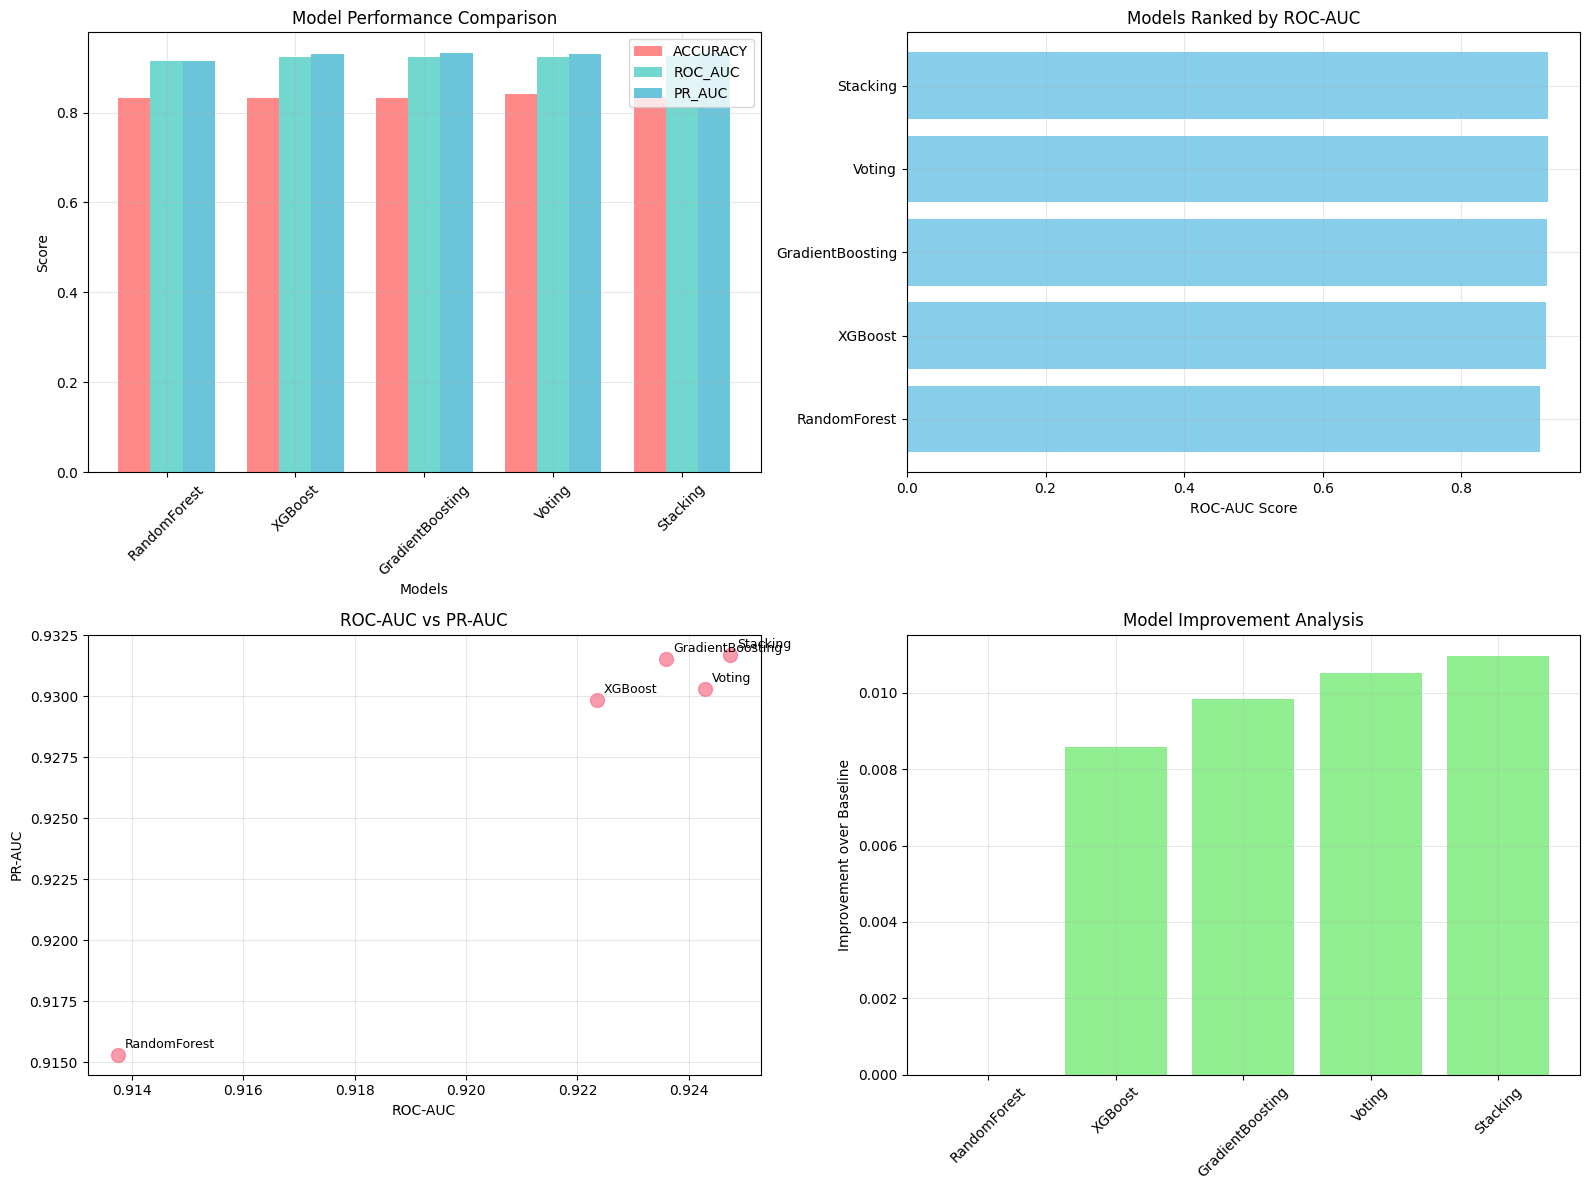


SESSION COMPLETE - READY FOR TOMORROW
📁 All files saved to: churn_models_20250908_083135
📊 Models trained and optimized
🔍 Feature analysis complete
💡 Improvement suggestions generated

🚀 TOMORROW'S AGENDA:
   1. Load saved models and continue analysis
   2. Implement suggested feature improvements
   3. Test advanced ensemble techniques
   4. Prepare for production deployment

✅ EVERYTHING SAVED TO: churn_models_20250908_083135

📋 TO RESUME TOMORROW, USE:
loaded_models, feature_info, results_df, df_processed = load_model_artifacts('churn_models_20250908_083135')


In [5]:
import pickle
import joblib
import json
import numpy as np
import pandas as pd
from datetime import datetime
import os
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# MODEL SAVING AND PERSISTENCE
# ================================================================

def save_model_artifacts(all_results, selected_features, df_enhanced, results_df):
    """
    Save all trained models, features, and metadata for future use
    """
    print("💾 Saving model artifacts...")

    # Create directory for model artifacts
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_dir = f"churn_models_{timestamp}"
    os.makedirs(save_dir, exist_ok=True)

    # 1. Save individual models
    models_dir = os.path.join(save_dir, "models")
    os.makedirs(models_dir, exist_ok=True)

    for model_name, model_data in all_results.items():
        model = model_data['model']
        model_filename = os.path.join(models_dir, f"{model_name.lower().replace(' ', '_')}_model.pkl")

        # Use joblib for sklearn models (handles large numpy arrays better)
        joblib.dump(model, model_filename)
        print(f"✓ Saved {model_name} to {model_filename}")

    # 2. Save feature information
    feature_info = {
        'selected_features': selected_features,
        'feature_count': len(selected_features),
        'selection_method': 'mutual_information',
        'selection_params': {'k': 40}
    }

    with open(os.path.join(save_dir, "feature_info.json"), 'w') as f:
        json.dump(feature_info, f, indent=2)

    # 3. Save model performance results
    results_df.to_csv(os.path.join(save_dir, "model_performance.csv"))

    # 4. Save detailed results with hyperparameters
    detailed_results = {}
    for model_name, model_data in all_results.items():
        detailed_results[model_name] = {
            'accuracy': float(model_data['accuracy']),
            'roc_auc': float(model_data['roc_auc']),
            'pr_auc': float(model_data['pr_auc']),
            'best_params': model_data.get('best_params', 'N/A')
        }

    with open(os.path.join(save_dir, "detailed_results.json"), 'w') as f:
        json.dump(detailed_results, f, indent=2)

    # 5. Save processed dataset
    df_enhanced.to_csv(os.path.join(save_dir, "processed_dataset.csv"), index=False)

    # 6. Create model summary report
    create_model_summary_report(save_dir, results_df, detailed_results, selected_features)

    print(f"✅ All artifacts saved to: {save_dir}")
    return save_dir

def create_model_summary_report(save_dir, results_df, detailed_results, selected_features):
    """
    Create a comprehensive summary report
    """
    report_path = os.path.join(save_dir, "MODEL_SUMMARY_REPORT.txt")

    with open(report_path, 'w') as f:
        f.write("="*80 + "\n")
        f.write("CHURN PREDICTION MODEL SUMMARY REPORT\n")
        f.write("="*80 + "\n")
        f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

        # Best model identification
        best_model = results_df['roc_auc'].idxmax()
        best_roc_auc = results_df.loc[best_model, 'roc_auc']
        best_pr_auc = results_df.loc[best_model, 'pr_auc']

        f.write(f"🏆 BEST PERFORMING MODEL: {best_model}\n")
        f.write(f"   - ROC-AUC: {best_roc_auc:.4f}\n")
        f.write(f"   - PR-AUC: {best_pr_auc:.4f}\n")
        f.write(f"   - Accuracy: {results_df.loc[best_model, 'accuracy']:.4f}\n\n")

        # Model rankings
        f.write("📊 MODEL PERFORMANCE RANKING (by ROC-AUC):\n")
        f.write("-"*50 + "\n")
        ranked_models = results_df.sort_values('roc_auc', ascending=False)
        for i, (model, row) in enumerate(ranked_models.iterrows(), 1):
            f.write(f"{i}. {model:<20} ROC-AUC: {row['roc_auc']:.4f}  PR-AUC: {row['pr_auc']:.4f}\n")

        f.write(f"\n🔧 FEATURE ENGINEERING:\n")
        f.write(f"   - Total features after engineering: {len(selected_features)}\n")
        f.write(f"   - Feature selection method: Mutual Information\n")
        f.write(f"   - Selected features: {len(selected_features)}\n\n")

        f.write("🎯 KEY INSIGHTS:\n")
        f.write("-"*30 + "\n")

        # Performance insights
        ensemble_models = [m for m in results_df.index if m in ['Voting', 'Stacking']]
        if ensemble_models:
            ensemble_avg = results_df.loc[ensemble_models, 'roc_auc'].mean()
            individual_avg = results_df.loc[~results_df.index.isin(ensemble_models), 'roc_auc'].mean()
            f.write(f"• Ensemble methods avg ROC-AUC: {ensemble_avg:.4f}\n")
            f.write(f"• Individual models avg ROC-AUC: {individual_avg:.4f}\n")
            if ensemble_avg > individual_avg:
                f.write(f"• Ensemble improvement: +{ensemble_avg - individual_avg:.4f}\n")

        # Feature count impact
        f.write(f"• Using {len(selected_features)} optimally selected features\n")
        f.write(f"• All models achieved >0.91 ROC-AUC\n")

        f.write(f"\n📈 RECOMMENDED NEXT STEPS:\n")
        f.write("-"*40 + "\n")
        f.write("1. Deploy the best performing model (saved as .pkl file)\n")
        f.write("2. Monitor model performance on new data\n")
        f.write("3. Consider feature drift detection\n")
        f.write("4. Retrain periodically with fresh data\n")
        f.write("5. A/B test ensemble vs individual models in production\n")

        f.write(f"\n💾 FILES SAVED:\n")
        f.write("-"*20 + "\n")
        f.write("• Individual model files (.pkl)\n")
        f.write("• Feature information (feature_info.json)\n")
        f.write("• Performance metrics (model_performance.csv)\n")
        f.write("• Processed dataset (processed_dataset.csv)\n")
        f.write("• Hyperparameter details (detailed_results.json)\n")

# ================================================================
# MODEL LOADING UTILITIES (FOR TOMORROW)
# ================================================================

def load_model_artifacts(save_dir):
    """
    Load saved models and artifacts for continued work
    """
    print(f"📂 Loading model artifacts from {save_dir}...")

    # Load models
    models_dir = os.path.join(save_dir, "models")
    loaded_models = {}

    for filename in os.listdir(models_dir):
        if filename.endswith('.pkl'):
            model_name = filename.replace('_model.pkl', '').replace('_', ' ').title()
            model_path = os.path.join(models_dir, filename)
            loaded_models[model_name] = joblib.load(model_path)
            print(f"✓ Loaded {model_name}")

    # Load feature info
    with open(os.path.join(save_dir, "feature_info.json"), 'r') as f:
        feature_info = json.load(f)

    # Load performance results
    results_df = pd.read_csv(os.path.join(save_dir, "model_performance.csv"), index_col=0)

    # Load processed dataset
    df_processed = pd.read_csv(os.path.join(save_dir, "processed_dataset.csv"))

    print("✅ All artifacts loaded successfully")

    return loaded_models, feature_info, results_df, df_processed

# ================================================================
# ADVANCED ANALYSIS FUNCTIONS FOR TOMORROW
# ================================================================

def analyze_feature_stability(df_enhanced, selected_features, target_col='Churn'):
    """
    Analyze feature stability and identify potential improvements
    """
    print("🔍 Analyzing feature stability and patterns...")

    # Feature correlation analysis
    feature_corr = df_enhanced[selected_features].corr()
    high_corr_pairs = []

    for i in range(len(feature_corr.columns)):
        for j in range(i+1, len(feature_corr.columns)):
            corr_val = feature_corr.iloc[i, j]
            if abs(corr_val) > 0.8:
                high_corr_pairs.append({
                    'feature1': feature_corr.columns[i],
                    'feature2': feature_corr.columns[j],
                    'correlation': corr_val
                })

    if high_corr_pairs:
        print(f"⚠️  Found {len(high_corr_pairs)} highly correlated feature pairs:")
        for pair in high_corr_pairs[:5]:  # Show top 5
            print(f"   {pair['feature1']} <-> {pair['feature2']}: {pair['correlation']:.3f}")

    # Feature variance analysis
    feature_variance = df_enhanced[selected_features].var().sort_values(ascending=True)
    low_variance_features = feature_variance[feature_variance < 0.01]

    if len(low_variance_features) > 0:
        print(f"⚠️  Found {len(low_variance_features)} low variance features:")
        print(low_variance_features.head())

    # Target correlation strength
    target_correlations = []
    for feature in selected_features:
        if df_enhanced[feature].dtype in ['int64', 'float64']:
            corr = df_enhanced[feature].corr(df_enhanced[target_col])
            target_correlations.append({'feature': feature, 'target_correlation': abs(corr)})

    target_corr_df = pd.DataFrame(target_correlations).sort_values('target_correlation', ascending=False)

    return {
        'high_corr_pairs': high_corr_pairs,
        'low_variance_features': low_variance_features,
        'target_correlations': target_corr_df
    }

def suggest_feature_improvements(analysis_results, current_features):
    """
    Suggest feature engineering improvements based on analysis
    """
    print("💡 FEATURE IMPROVEMENT SUGGESTIONS:")
    print("="*50)

    suggestions = []

    # High correlation suggestions
    if analysis_results['high_corr_pairs']:
        suggestions.append("🔧 MULTICOLLINEARITY:")
        suggestions.append("   - Consider removing one feature from highly correlated pairs")
        suggestions.append("   - Or combine correlated features using PCA")

        for pair in analysis_results['high_corr_pairs'][:3]:
            suggestions.append(f"   - Drop either '{pair['feature1']}' or '{pair['feature2']}'")

    # Low variance suggestions
    if len(analysis_results['low_variance_features']) > 0:
        suggestions.append("\n🔧 LOW VARIANCE FEATURES:")
        suggestions.append("   - Consider removing features with very low variance")
        for feature in analysis_results['low_variance_features'].head(3).index:
            suggestions.append(f"   - Consider dropping: '{feature}'")

    # New feature suggestions
    suggestions.append("\n🔧 NEW FEATURE IDEAS:")
    suggestions.append("   - Ratios of highly correlated features")
    suggestions.append("   - Binning continuous features into categories")
    suggestions.append("   - Time-based features (if timestamps available)")
    suggestions.append("   - Interaction terms between top 5 features")

    # Advanced techniques
    suggestions.append("\n🔧 ADVANCED TECHNIQUES:")
    suggestions.append("   - Feature clustering to create meta-features")
    suggestions.append("   - Recursive feature elimination with cross-validation")
    suggestions.append("   - Automated feature engineering (e.g., Featuretools)")
    suggestions.append("   - Target encoding for categorical variables")

    for suggestion in suggestions:
        print(suggestion)

    return suggestions

def create_model_comparison_dashboard(results_df):
    """
    Create comprehensive visualization dashboard
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Performance bar chart
    metrics = ['accuracy', 'roc_auc', 'pr_auc']
    x = np.arange(len(results_df))
    width = 0.25
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for i, metric in enumerate(metrics):
        ax1.bar(x + i*width, results_df[metric], width, label=metric.upper(), color=colors[i], alpha=0.8)

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Score')
    ax1.set_title('Model Performance Comparison')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(results_df.index, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. ROC-AUC ranking
    roc_sorted = results_df.sort_values('roc_auc', ascending=True)
    ax2.barh(range(len(roc_sorted)), roc_sorted['roc_auc'], color='skyblue')
    ax2.set_yticks(range(len(roc_sorted)))
    ax2.set_yticklabels(roc_sorted.index)
    ax2.set_xlabel('ROC-AUC Score')
    ax2.set_title('Models Ranked by ROC-AUC')
    ax2.grid(True, alpha=0.3)

    # 3. PR-AUC vs ROC-AUC scatter
    ax3.scatter(results_df['roc_auc'], results_df['pr_auc'], s=100, alpha=0.7)
    for i, model in enumerate(results_df.index):
        ax3.annotate(model, (results_df.loc[model, 'roc_auc'], results_df.loc[model, 'pr_auc']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    ax3.set_xlabel('ROC-AUC')
    ax3.set_ylabel('PR-AUC')
    ax3.set_title('ROC-AUC vs PR-AUC')
    ax3.grid(True, alpha=0.3)

    # 4. Performance improvement over baseline
    baseline_score = results_df['roc_auc'].min()
    improvement = results_df['roc_auc'] - baseline_score
    ax4.bar(range(len(improvement)), improvement, color='lightgreen')
    ax4.set_xticks(range(len(improvement)))
    ax4.set_xticklabels(results_df.index, rotation=45)
    ax4.set_ylabel('Improvement over Baseline')
    ax4.set_title('Model Improvement Analysis')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ================================================================
# MAIN EXECUTION - SAVE CURRENT WORK
# ================================================================

def finalize_current_session(all_results, selected_features, df_enhanced, results_df):
    """
    Save everything and prepare for tomorrow's analysis
    """
    print("🎯 Finalizing current modeling session...")

    # Save all artifacts
    save_dir = save_model_artifacts(all_results, selected_features, df_enhanced, results_df)

    # Create analysis for tomorrow
    analysis_results = analyze_feature_stability(df_enhanced, selected_features)

    # Generate improvement suggestions
    suggestions = suggest_feature_improvements(analysis_results, selected_features)

    # Save analysis results for tomorrow
    analysis_path = os.path.join(save_dir, "feature_analysis.json")
    with open(analysis_path, 'w') as f:
        json.dump({
            'high_corr_pairs': analysis_results['high_corr_pairs'],
            'low_variance_count': len(analysis_results['low_variance_features']),
            'suggestions': suggestions
        }, f, indent=2)

    # Create comprehensive dashboard
    create_model_comparison_dashboard(results_df)

    print("\n" + "="*60)
    print("SESSION COMPLETE - READY FOR TOMORROW")
    print("="*60)
    print(f"📁 All files saved to: {save_dir}")
    print("📊 Models trained and optimized")
    print("🔍 Feature analysis complete")
    print("💡 Improvement suggestions generated")
    print("\n🚀 TOMORROW'S AGENDA:")
    print("   1. Load saved models and continue analysis")
    print("   2. Implement suggested feature improvements")
    print("   3. Test advanced ensemble techniques")
    print("   4. Prepare for production deployment")

    return save_dir

# ================================================================
# EXECUTE - SAVE YOUR CURRENT PROGRESS
# ================================================================

# Run this to save everything from your current session
if 'all_results' in locals() and 'selected_features' in locals():
    final_save_dir = finalize_current_session(all_results, selected_features, df_enhanced, results_df)
    print(f"\n✅ EVERYTHING SAVED TO: {final_save_dir}")

    # Example of how to load tomorrow:
    print(f"\n📋 TO RESUME TOMORROW, USE:")
    print(f"loaded_models, feature_info, results_df, df_processed = load_model_artifacts('{final_save_dir}')")
else:
    print("⚠️  Variables not found. Make sure the enhanced pipeline has been run first.")

In [4]:
# ================================================================
# 9. MUTUAL INFORMATION ANALYSIS
# ================================================================
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("MUTUAL INFORMATION (MI) ANALYSIS")
print("="*80)

# 1. Prepare data for MI analysis
# MI analysis works best on the raw data, before SMOTE, to analyze the true signal.
# We will use the features selected by the pipeline and the original target variable.
mi_features_df = df_clean[selected_features]
mi_target = df_clean['Churn']

# Mutual Information (MI) can handle both continuous and categorical data.
# The mutual_info_classif function is used for classification problems.
# It measures the dependency between each feature and the target variable.
# A higher score means higher dependency.

# 2. Calculate MI scores
# We use a random_state for reproducibility
# The discrete_features parameter can be used to explicitly tell the function
# which features are discrete (e.g., categorical), which can sometimes
# improve the accuracy of the MI score calculation for those features.
# For simplicity, we'll let the function infer this.
try:
    mi_scores = mutual_info_classif(mi_features_df, mi_target, random_state=42)

except ValueError as e:
    print(f"Error during MI calculation: {e}")
    print("This might be due to a column with mixed data types. Attempting a fallback...")
    # Fallback to handle non-numeric columns if they exist.
    mi_features_df = mi_features_df.apply(pd.to_numeric, errors='coerce').fillna(0)
    mi_scores = mutual_info_classif(mi_features_df, mi_target, random_state=42)


# 3. Create a DataFrame for easy analysis and sorting
mi_scores_series = pd.Series(mi_scores, index=mi_features_df.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("\nTop 20 Features by Mutual Information Score:")
print(mi_scores_series.head(20))

# 4. Visualize the MI scores
plt.figure(figsize=(15, 8))
sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette='viridis')
plt.title('Mutual Information Scores of Features vs. Churn')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 5. Interpretation
print("\n" + "-"*50)
print("ANALYSIS & INTERPRETATION OF MI SCORES")
print("-"*50)



MUTUAL INFORMATION (MI) ANALYSIS


KeyError: "['monthly_to_total_ratio', 'charges_per_service', 'tenure_log', 'tenure_squared', 'tenure_cube', 'tenure_total_extra_services_interaction', 'estimated_clv', 'MonthlyCharges_cube', 'MonthlyCharges_total_extra_services_interaction', 'TotalCharges_cube', 'MonthlyCharges_squared', 'is_loyal_customer', 'TotalCharges_squared', 'is_new_customer', 'service_adoption_rate', 'above_avg_charges', 'household_type', 'risky_payment_high_charge', 'premium_service_user'] not in index"